In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

sigma_sq = 0.2
alpha = 0.1
VL, VR = 0.1, 0.1

# Store the evolution of VL and VR
VL_history = [VL] 
VR_history = [VR]
RPE_history = []
QC_history = []
choice_history = []
reward_history = [] 
stimulus_history = []
pR_history = []
pL_history = []

print(f"Trial 0: VL = {VL:.2f}, VR = {VR:.2f}")

np.random.seed(0)
for n in range(500):
    s = np.random.uniform(-1, 1)

    pR, _ = quad(lambda x: norm(s, np.sqrt(sigma_sq)).pdf(x), 0, np.inf)
    pL = 1 - pR

    QL = pL * VL
    QR = pR * VR

    if QL > QR:
        c = 'L'
        pC = pL
        VC = VL  
        QC = QL
    else:
        c = 'R'
        pC = pR
        VC = VR
        QC = QR

    V_trialonset = (VL + VR) / 2
    PE = QC - V_trialonset

    # set r = 1 if choice matches the sign of stimulus, 0 otherwise
    r = 1 if np.sign(s) == (1 if c == 'R' else -1) else 0
    delta = r - QC

    VC = VC + alpha * delta
    if c == 'L':
        VL = VC
    else:
        VR = VC

    # Append the updated values to the history lists
    VL_history.append(VL)
    VR_history.append(VR)
    RPE_history.append(delta)
    QC_history.append(QC)
    choice_history.append(c)
    reward_history.append(r)
    stimulus_history.append(s)
    pR_history.append(pR)
    pL_history.append(pL)

    # Print all relevant values every 50 trials
    if (n+1) % 100 == 0:
        print(f"Trial {n+1}: s = {s:.2f}, c = {c}, r = {r}, PE = {PE:.2f}, delta = {delta:.2f}, VL = {VL:.2f}, VR = {VR:.2f},\n"
      f"pL = {pL:.2f}, pR = {pR:.2f}, pC = {pC:.2f}, QL = {QL:.2f}, QR = {QR:.2f}, QC = {QC:.2f}")

Trial 0: VL = 0.10, VR = 0.10
Trial 100: s = -0.99, c = L, r = 1, PE = -0.07, delta = -0.10, VL = 1.11, VR = 1.22,
pL = 0.99, pR = 0.01, pC = 0.99, QL = 1.10, QR = 0.02, QC = 1.10
Trial 200: s = -0.13, c = L, r = 1, PE = -0.48, delta = 0.28, VL = 1.20, VR = 1.23,
pL = 0.62, pR = 0.38, pC = 0.62, QL = 0.72, QR = 0.47, QC = 0.72
Trial 300: s = 0.92, c = R, r = 1, PE = -0.04, delta = -0.14, VL = 1.20, VR = 1.15,
pL = 0.02, pR = 0.98, pC = 0.98, QL = 0.02, QR = 1.14, QC = 1.14
Trial 400: s = -0.63, c = L, r = 1, PE = -0.06, delta = -0.14, VL = 1.22, VR = 1.16,
pL = 0.92, pR = 0.08, pC = 0.92, QL = 1.14, QR = 0.09, QC = 1.14
Trial 500: s = 0.01, c = L, r = 0, PE = -0.61, delta = -0.61, VL = 1.19, VR = 1.19,
pL = 0.49, pR = 0.51, pC = 0.49, QL = 0.61, QR = 0.61, QC = 0.61


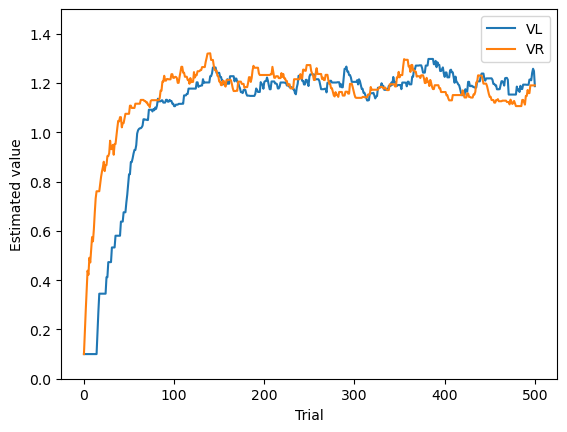

In [117]:
plt.plot(VL_history, label='VL')
plt.plot(VR_history, label='VR')
plt.xlabel('Trial')
plt.ylabel('Estimated value')
plt.ylim(0, 1.5)
plt.legend()
plt.show()


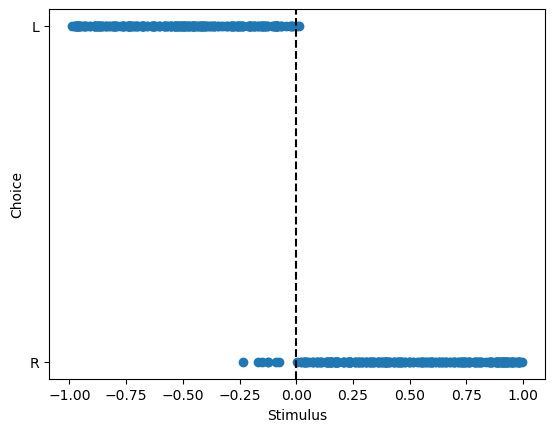

Accuracy: 0.99


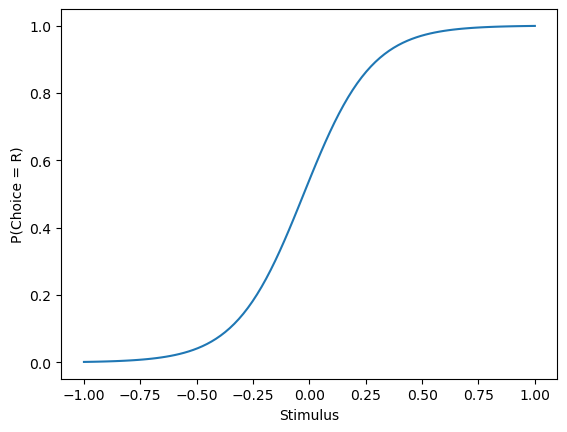

In [119]:
# plot choice Vs stimulus, then fit a logistic regression model to the data
plt.scatter(stimulus_history, choice_history)
plt.xlabel('Stimulus')
plt.ylabel('Choice')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array(stimulus_history).reshape(-1, 1)
y = np.array(choice_history)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# plot the logistic regression model
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = logreg.predict_proba(x)[:, 1]
plt.plot(x, y)
plt.xlabel('Stimulus')
plt.ylabel('P(Choice = R)')
plt.show()

